#**PROJECT ON HEALTH INSURANCE CLAIM AMOUNT PREDICTION**


##**problem statement**
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

##**Data Definition**
**age** : Age of the policyholder (Numeric)

**sex**: Gender of policyholder (Categoric)

**weight**: Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents**: Number of dependent persons on the policyholder (Numeric)

**smoker**: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim**: The amount claimed by the policyholder (Numeric)

**bloodpressure**: Bloodpressure reading of policyholder (Numeric)

**diabetes**: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex**: A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title**: Job profile of the policyholder (Categoric)

**city**: The city in which the policyholder resides (Categoric)

**hereditary_diseases**: A policyholder suffering from a hereditary diseases or not (Categoric)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# importing dataset

In [ ]:
ids = pd.read_csv("/content/drive/MyDrive/Academic_projects/DMMLT_project/healthinsurance.csv")
ids

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [ ]:
ids.shape

(15000, 13)

In [ ]:

ids.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


#Exploratory Data Analysis
##Checking the distributions of numerical variables

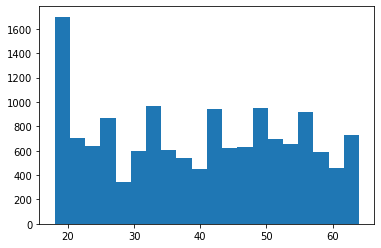

In [ ]:
plt.hist(x=ids['age'],bins= 20)
plt.show()

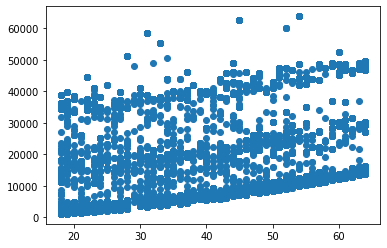

In [ ]:
plt.scatter(x=ids['age'],y= ids["claim"])

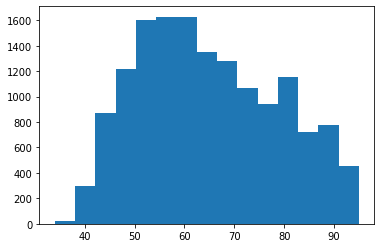

In [ ]:
#weight distn
plt.hist(x=ids['weight'],bins= 15)
plt.show()

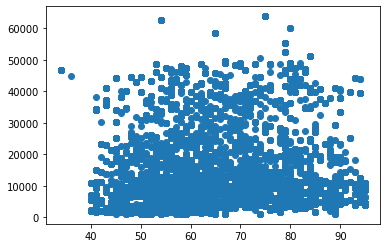

In [ ]:
plt.scatter(x=ids['weight'],y= ids["claim"])

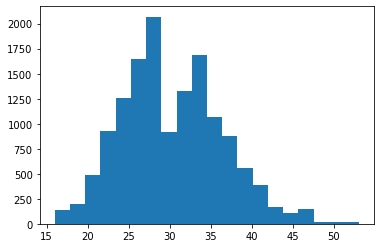

In [ ]:
#bmi distn
plt.hist(x=ids['bmi'],bins= 20)
plt.show()

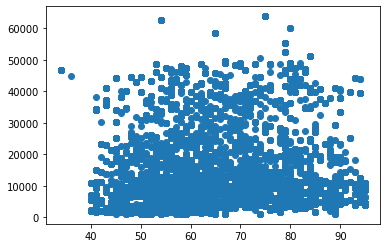

In [ ]:
plt.scatter(x=ids['weight'],y= ids["claim"])

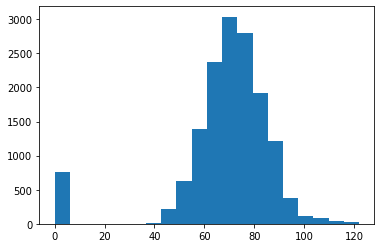

In [ ]:
#bloodpressure distn
plt.hist(x=ids['bloodpressure'],bins= 20)
plt.show()

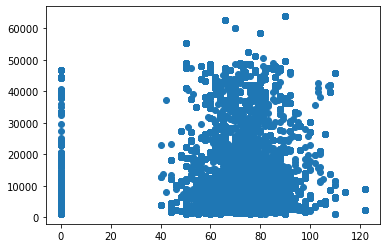

In [ ]:
plt.scatter(x=ids['bloodpressure'],y= ids["claim"])

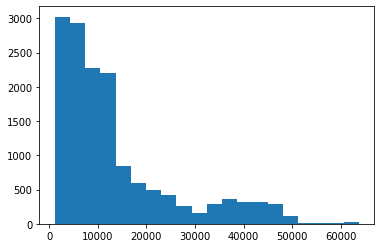

In [ ]:
#claim col distn
plt.hist(x=ids['claim'],bins= 20)
plt.show()

NOTE: Claim is postively skewed, so will apply log transformation at a later date

#**Checking categorical variables**

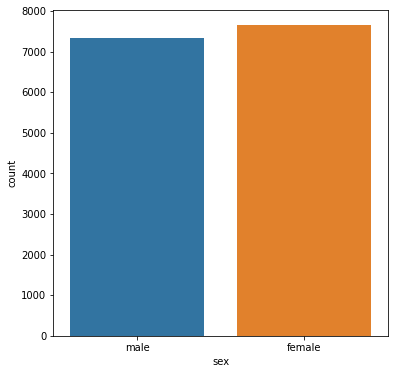

In [ ]:
#sex distn
#bar plot
plt.figure(figsize = (6,6))
sns.countplot(x="sex",data= ids)
plt.show()

In [ ]:
ids["sex"].value_counts()

female    7652
male      7348
Name: sex, dtype: int64

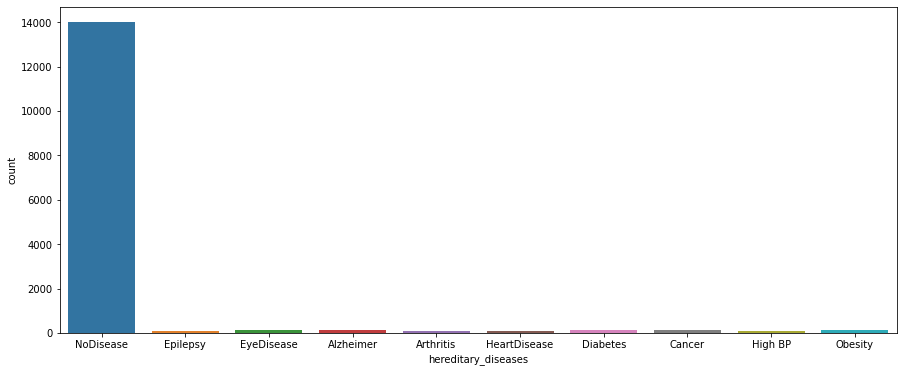

In [ ]:
#hereditary_diseases distn
plt.figure(figsize = (15,6))
sns.countplot(x="hereditary_diseases",data= ids)
plt.show()

In [ ]:
ids["hereditary_diseases"].value_counts()

NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: hereditary_diseases, dtype: int64

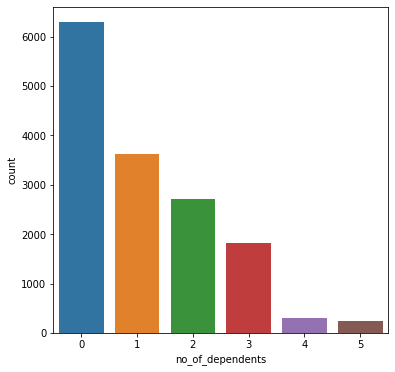

In [ ]:
#no_of_dependents distn
plt.figure(figsize = (6,6))
sns.countplot(x="no_of_dependents",data= ids)
plt.show()

In [ ]:
ids["no_of_dependents"].value_counts()

0    6290
1    3625
2    2721
3    1820
4     301
5     243
Name: no_of_dependents, dtype: int64

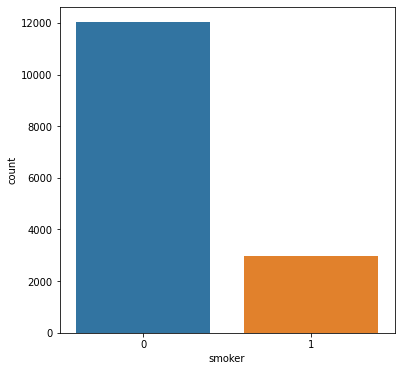

In [ ]:
#smoker distn
plt.figure(figsize = (6,6))
sns.countplot(x="smoker",data= ids)
plt.show()

In [ ]:
ids["smoker"].value_counts()

0    12028
1     2972
Name: smoker, dtype: int64

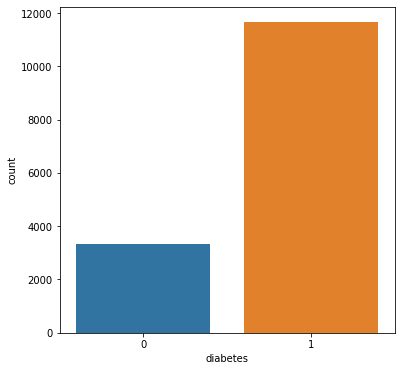

In [ ]:
#diabetes distn 
plt.figure(figsize = (6,6))
sns.countplot(x="diabetes",data= ids)
plt.show()

In [ ]:
ids["diabetes"].value_counts()

1    11655
0     3345
Name: diabetes, dtype: int64

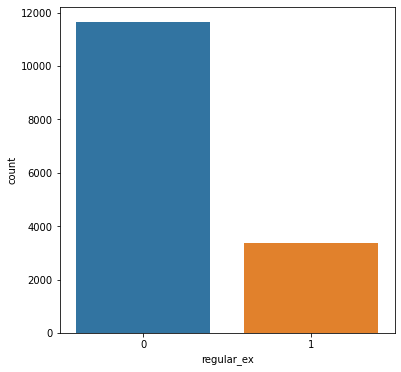

In [ ]:
#regular_ex distn
plt.figure(figsize = (6,6))
sns.countplot(x="regular_ex",data= ids)
plt.show()

In [ ]:
ids["regular_ex"].value_counts()

0    11638
1     3362
Name: regular_ex, dtype: int64

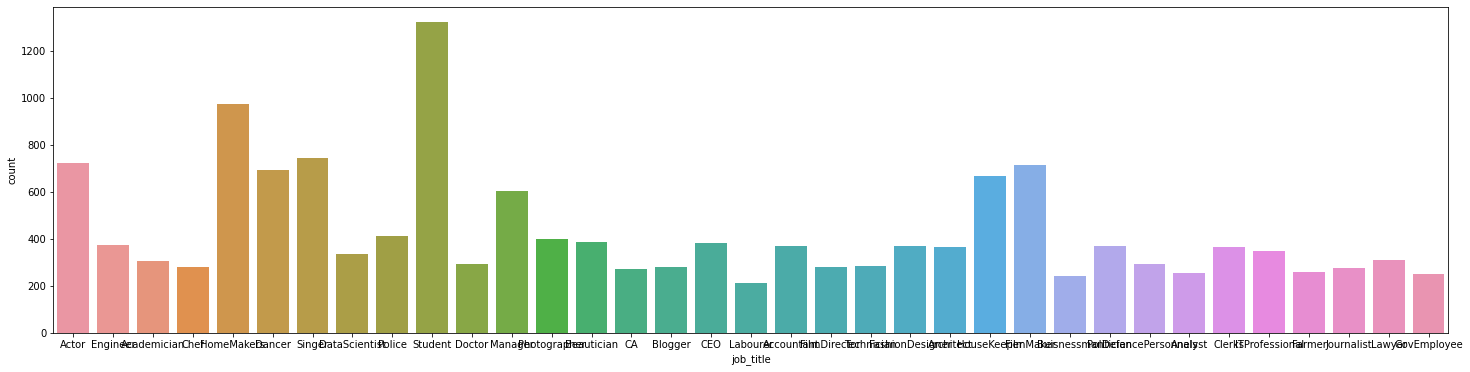

In [ ]:
#job_title distn
plt.figure(figsize = (25,6))
sns.countplot(x="job_title",data= ids)
plt.show()

In [ ]:
ids["job_title"].value_counts()

Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Chef                  281
FilmDirector          281
Blogger               281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: job_title, dtype: int64

# checking outliers

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


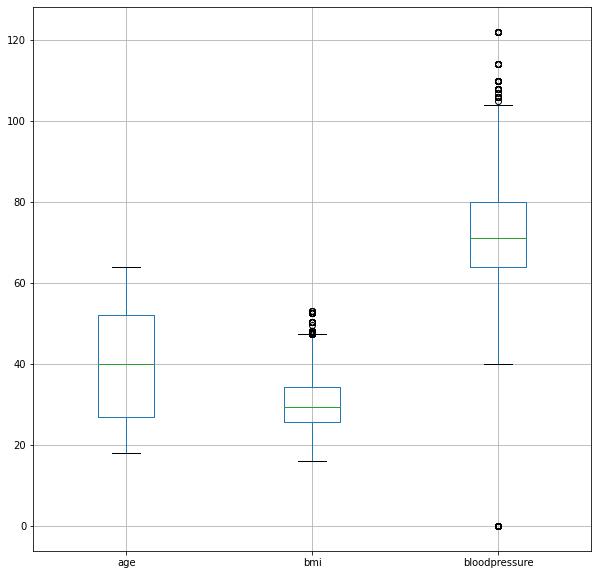

In [ ]:
plt.figure(figsize = (10,10))
ids.boxplot(column=['age','bmi','bloodpressure'])
plt.show()

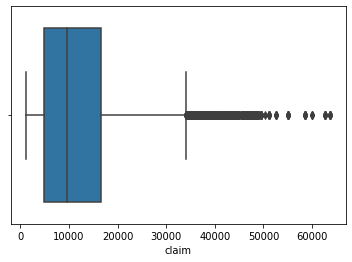

In [ ]:
sns.boxplot(x=ids['claim'])
plt.show()

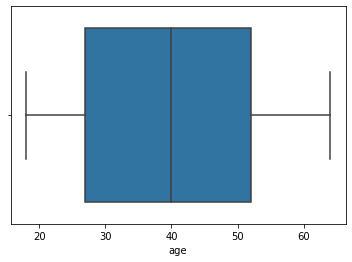

In [ ]:
sns.boxplot(x=ids['age'])
plt.show()

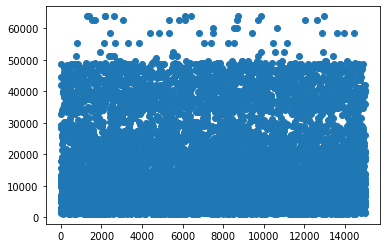

In [ ]:
plt.scatter(ids.index,ids["claim"])

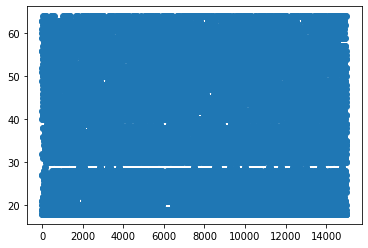

In [ ]:
plt.scatter(ids.index,ids["age"])

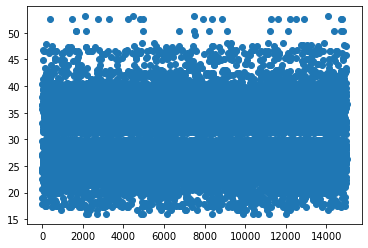

In [ ]:
plt.scatter(ids.index,ids["bmi"])

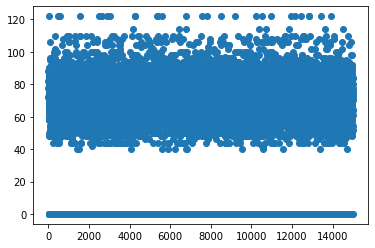

In [ ]:
plt.scatter(ids.index,ids["bloodpressure"])

# INFERENCE:

# bmi has outliers 
# bloodpressure has outliers
# claim has outliers

#Handling Outliers

In [ ]:
max_treshold= ids['bmi'].quantile(0.95)
max_treshold

40.5

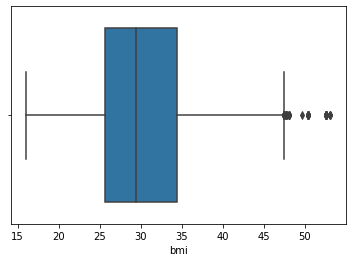

In [ ]:
#plot before handling outliers
sns.boxplot(x=ids['bmi'])
plt.show()

In [ ]:
ids['bmi'][ids['bmi']>max_treshold]= max_treshold

<ipython-input-8-6735ad895042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['bmi'][ids['bmi']>max_treshold]= max_treshold


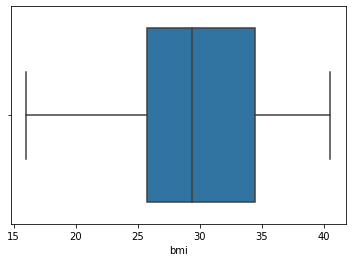

In [ ]:
# after handling outliers
sns.boxplot(x=ids['bmi'])
plt.show()

In [ ]:
#bloodpressure outlier handling
min_treshold2=ids['bloodpressure'].quantile(0.06)
min_treshold2

48.0

In [ ]:
max_treshold2=ids['bloodpressure'].quantile(0.95)
max_treshold2

90.0

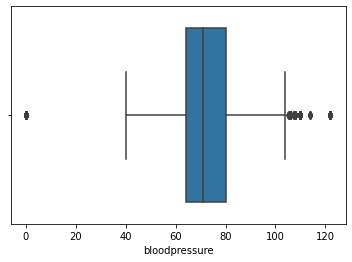

In [ ]:
#before handling outlier 
sns.boxplot(x=ids['bloodpressure'])
plt.show()

In [ ]:
ids['bloodpressure'][ids['bloodpressure']<min_treshold2]= min_treshold2

<ipython-input-13-604a84b50ea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['bloodpressure'][ids['bloodpressure']<min_treshold2]= min_treshold2


In [ ]:
ids['bloodpressure'][ids['bloodpressure']>max_treshold2]= max_treshold2

<ipython-input-14-19a2945e273d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['bloodpressure'][ids['bloodpressure']>max_treshold2]= max_treshold2


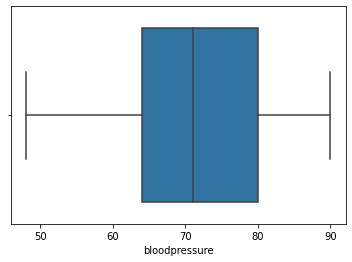

In [ ]:
sns.boxplot(x=ids['bloodpressure'])
plt.show()

# Missing Values

In [ ]:
#before handling missing values
ids.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

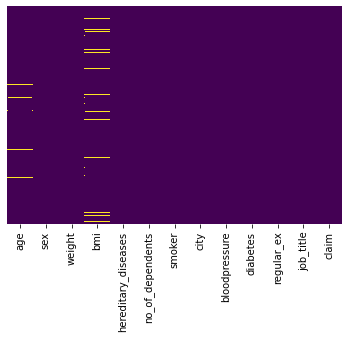

In [ ]:
sns.heatmap(ids.isnull(),cbar=False,yticklabels=False,cmap='viridis')

###age and bmi have missing values
**Imputing age with mean and bmi with median values.**

In [ ]:
ids['age'].fillna(value=ids['age'].mean(),inplace= True)

In [ ]:
ids['bmi'].fillna(value=ids['bmi'].median(),inplace= True) #uning median imputation, since bmi has outliers

In [ ]:
#after handling missing values
ids.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

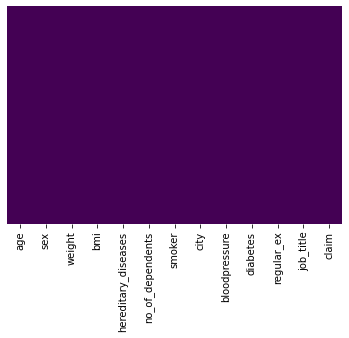

In [ ]:
# heatmap after handling missing values
sns.heatmap(ids.isnull(),cbar=False,yticklabels=False,cmap='viridis')

#Applying transformation to claim

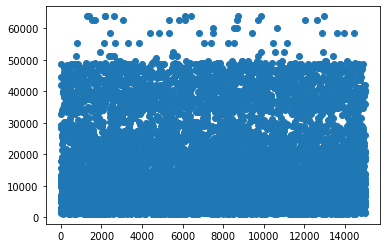

In [ ]:
plt.scatter( ids.index,ids["claim"])

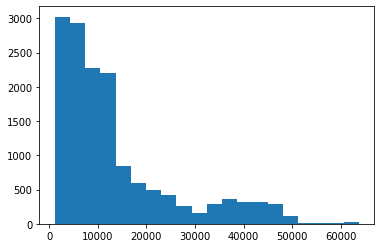

In [ ]:
#histogram before transformationn
plt.hist(x=ids['claim'],bins= 20)
plt.show()

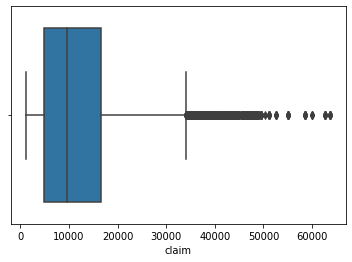

In [ ]:
#boxplot before transformation
sns.boxplot(x=ids['claim'])
plt.show()

In [ ]:
#log transformation
ids['claim']=np.log(1+ids['claim'])

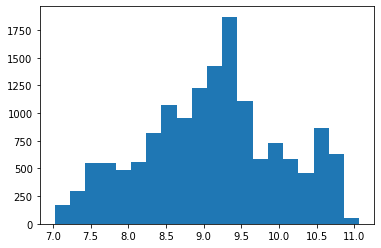

In [ ]:
#after transformation
plt.hist(x=ids['claim'],bins= 20)
plt.show()

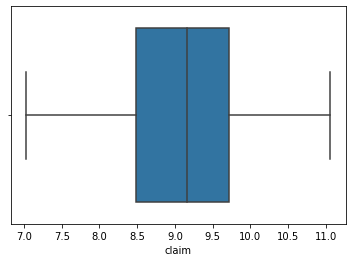

In [ ]:
#after transformation
sns.boxplot(x=ids['claim'])
plt.show()

In [ ]:
ids.drop(['city','weight'],axis=1,inplace=True)

In [ ]:
ids.head()

,age,sex,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,24.3,NoDisease,1,0,72,0,0,Actor,9.481405
1,49.0,female,22.6,NoDisease,1,0,78,1,1,Engineer,9.166179
2,32.0,female,17.8,Epilepsy,2,1,88,1,1,Academician,10.396206
3,61.0,female,36.4,NoDisease,1,1,72,1,0,Chef,10.789703
4,19.0,female,20.6,NoDisease,0,0,82,1,0,HomeMakers,7.457436


#Handling categorical variables

In [ ]:
ids['hereditary_diseases'].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [ ]:
ids['hereditary_diseases']=ids['hereditary_diseases'].map({'NoDisease':'NoDisease', 'Epilepsy':'moderate', 'EyeDisease':'moderate', 'Alzheimer':'moderate', 'Arthritis':'moderate',
       'HeartDisease':'severe', 'Diabetes':'severe', 'Cancer':'severe', 'High BP':'moderate', 'Obesity':'moderate'})

In [ ]:
ids['hereditary_diseases'].value_counts()

NoDisease    13998
moderate       652
severe         350
Name: hereditary_diseases, dtype: int64

In [ ]:
ids['job_title'].unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [ ]:
ids['job_title']=ids['job_title'].map({'Actor':'avg_stressed', 'Engineer':'more_stressed', 'Academician':'avg_stressed', 'Chef':'less_stressed', 'HomeMakers':'less_stressed', 'Dancer':'less_stressed',
    'Singer':'less_stressed', 'DataScientist':'avg_stressed', 'Police':'avg_stressed', 'Student':'avg_stressed', 'Doctor':'less_stressed',
   'Manager':'more_stressed', 'Photographer':'less_stressed', 'Beautician':'less_stressed', 'CA':'avg_stressed', 'Blogger':'less_stressed', 'CEO':'avg_stressed',
   'Labourer':'less_stressed', 'Accountant':'more_stressed', 'FilmDirector':'more_stressed', 'Technician':'less_stressed',
   'FashionDesigner':'avg_stressed', 'Architect':'avg_stressed', 'HouseKeeper':'less_stressed', 'FilmMaker':'avg_stressed',
   'Buisnessman':'more_stressed', 'Politician':'avg_stressed', 'DefencePersonnels':'avg_stressed', 'Analyst':'avg_stressed',
   'Clerks':'avg_stressed', 'ITProfessional':'more_stressed', 'Farmer':'less_stressed', 'Journalist':'more_stressed', 'Lawyer':'avg_stressed',
   'GovEmployee':'less_stressed'})

In [ ]:
ids['job_title'].value_counts()

avg_stressed     6792
less_stressed    5718
more_stressed    2490
Name: job_title, dtype: int64

# Dummy Variable handling

In [ ]:
ids.head()

,age,sex,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,24.3,NoDisease,1,0,72,0,0,avg_stressed,9.481405
1,49.0,female,22.6,NoDisease,1,0,78,1,1,more_stressed,9.166179
2,32.0,female,17.8,moderate,2,1,88,1,1,avg_stressed,10.396206
3,61.0,female,36.4,NoDisease,1,1,72,1,0,less_stressed,10.789703
4,19.0,female,20.6,NoDisease,0,0,82,1,0,less_stressed,7.457436


In [ ]:
ids=pd.get_dummies(ids)

In [ ]:
ids.head()

,age,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_female,sex_male,hereditary_diseases_NoDisease,hereditary_diseases_moderate,hereditary_diseases_severe,job_title_avg_stressed,job_title_less_stressed,job_title_more_stressed
0,60.0,24.3,1,0,72,0,0,9.481405,0,1,1,0,0,1,0,0
1,49.0,22.6,1,0,78,1,1,9.166179,1,0,1,0,0,0,0,1
2,32.0,17.8,2,1,88,1,1,10.396206,1,0,0,1,0,1,0,0
3,61.0,36.4,1,1,72,1,0,10.789703,1,0,1,0,0,0,1,0
4,19.0,20.6,0,0,82,1,0,7.457436,1,0,1,0,0,0,1,0


In [ ]:
ids.drop(['sex_female','hereditary_diseases_NoDisease','job_title_avg_stressed'],axis=1,inplace=True)

In [ ]:
ids.head(20)

,age,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,hereditary_diseases_moderate,hereditary_diseases_severe,job_title_less_stressed,job_title_more_stressed
0,60.0,24.3,1,0,72,0,0,9.481405,1,0,0,0,0
1,49.0,22.6,1,0,78,1,1,9.166179,0,0,0,0,1
2,32.0,17.8,2,1,88,1,1,10.396206,0,1,0,0,0
3,61.0,36.4,1,1,72,1,0,10.789703,0,0,0,1,0
4,19.0,20.6,0,0,82,1,0,7.457436,0,0,0,1,0
5,42.0,37.9,0,0,78,0,0,8.775704,0,0,0,1,0
6,18.0,23.8,0,0,64,0,0,7.442258,1,0,0,1,0
7,21.0,26.8,0,0,74,1,0,7.336481,1,0,0,0,0
8,63.0,29.4,0,0,70,1,0,9.502383,1,0,0,1,0
9,40.0,29.6,0,0,64,1,1,8.684723,0,0,0,0,0


# Independent and Dependent Columns storing in x and y

In [ ]:
x=ids.drop(['claim'],axis=1)
y=ids['claim']

In [ ]:
x

,age,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,sex_male,hereditary_diseases_moderate,hereditary_diseases_severe,job_title_less_stressed,job_title_more_stressed
0,60.0,24.3,1,0,72,0,0,1,0,0,0,0
1,49.0,22.6,1,0,78,1,1,0,0,0,0,1
2,32.0,17.8,2,1,88,1,1,0,1,0,0,0
3,61.0,36.4,1,1,72,1,0,0,0,0,1,0
4,19.0,20.6,0,0,82,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,28.3,1,1,54,1,0,1,0,0,0,0
14996,39.0,29.6,4,0,64,1,0,1,0,0,0,0
14997,20.0,33.3,0,0,52,1,0,1,0,0,0,0
14998,52.0,36.7,0,0,70,1,0,1,0,0,1,0


In [ ]:
y

0         9.481405
1         9.166179
2        10.396206
3        10.789703
4         7.457436
           ...    
14995     9.956232
14996     8.924430
14997     7.238856
14998     9.121028
14999    10.165613
Name: claim, Length: 15000, dtype: float64

# Correlation 

In [ ]:
round(ids.corr(),2)

,age,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,hereditary_diseases_moderate,hereditary_diseases_severe,job_title_less_stressed,job_title_more_stressed
age,1.00,0.19,0.06,-0.02,0.01,0.07,0.01,0.52,0.01,-0.03,0.01,0.01,0.06
bmi,0.19,1.00,0.04,0.02,-0.05,0.09,-0.03,0.18,0.07,0.09,0.10,-0.01,0.03
no_of_dependents,0.06,0.04,1.00,0.01,0.03,0.07,-0.01,0.16,0.04,-0.02,-0.00,-0.04,0.01
smoker,-0.02,0.02,0.01,1.00,0.01,0.06,-0.04,0.65,0.07,0.40,0.27,-0.06,0.02
bloodpressure,0.01,-0.05,0.03,0.01,1.00,-0.00,0.08,0.03,-0.00,0.01,0.06,0.03,-0.00
diabetes,0.07,0.09,0.07,0.06,-0.00,1.00,0.01,0.13,-0.01,0.05,0.07,-0.02,0.05
regular_ex,0.01,-0.03,-0.01,-0.04,0.08,0.01,1.00,-0.02,0.02,-0.04,-0.01,0.02,0.01
claim,0.52,0.18,0.16,0.65,0.03,0.13,-0.02,1.00,0.02,0.33,0.25,-0.05,0.08
sex_male,0.01,0.07,0.04,0.07,-0.00,-0.01,0.02,0.02,1.00,0.01,0.05,-0.04,-0.01
hereditary_diseases_moderate,-0.03,0.09,-0.02,0.40,0.01,0.05,-0.04,0.33,0.01,1.00,-0.03,-0.08,0.06


#Correlation visualisation

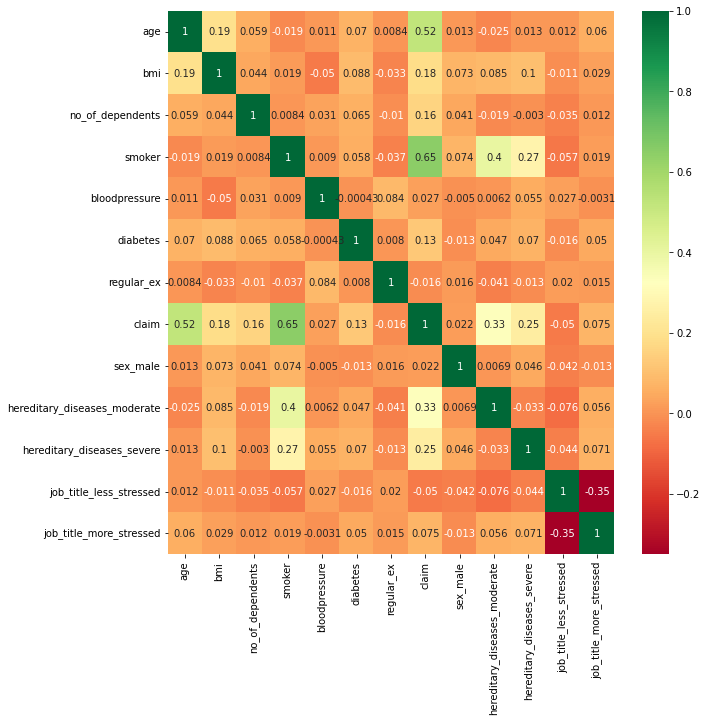

In [ ]:
plt.figure(figsize=(10,10))
g=sns.heatmap(ids.corr(),annot=True,cmap='RdYlGn')

# no multicollinearity found

# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#feature scaling : standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[-0.90083593,  0.65748549, -0.92731656, ..., -0.15709123,
        -0.78329678,  2.22274471],
       [ 0.33113865, -0.90824182, -0.11471259, ..., -0.15709123,
        -0.78329678, -0.44989422],
       [ 0.91089139, -1.23218541, -0.92731656, ..., -0.15709123,
        -0.78329678,  2.22274471],
       ...,
       [ 1.34570594,  1.01742281, -0.92731656, ..., -0.15709123,
        -0.78329678, -0.44989422],
       [ 0.91089139, -1.03421988,  1.51049534, ..., -0.15709123,
         1.27665531, -0.44989422],
       [ 1.05582957, -0.44032331, -0.11471259, ..., -0.15709123,
        -0.78329678, -0.44989422]])

# Importing the Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

# Prediction on test data

In [ ]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)
error=y_test-y_pred1

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4,'error_lr':error})

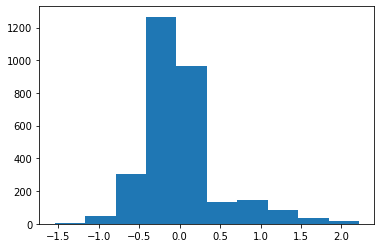

In [ ]:
plt.hist(x=df1['error_lr'],bins= 10)
plt.show()

In [ ]:
df1['error_lr'].mean() #for lr errors follows approx normal distn with 0 mean  

0.00563405605131342

In [ ]:
y_test

1670      8.817890
13379     7.807307
10234     9.527084
4719      7.450312
7003      9.499504
           ...    
10346     8.953239
8469      7.037028
12765     8.941205
9431     10.456815
4202      9.302035
Name: claim, Length: 3000, dtype: float64

In [ ]:
df1.head(15)
#by comparing we can see randomforest is giving the best results

,Actual,lr,svm,rf,gr,error_lr
1670,8.817890,8.765396,8.717865,8.817890,8.822316,0.052494
13379,7.807307,8.177202,7.846304,7.807307,8.139535,-0.369895
10234,9.527084,8.827290,9.059055,9.527084,8.943645,0.699794
4719,7.450312,8.001466,7.765762,7.581531,7.737899,-0.551154
7003,9.499504,9.358804,9.508808,9.499504,9.460143,0.140700
2831,10.390511,9.315073,10.083000,10.390511,10.096307,1.075438
13014,8.447264,8.512583,8.441445,8.446366,8.542469,-0.065318
11979,8.874658,8.960119,8.974980,8.874658,9.022420,-0.085461
8610,8.129588,8.312189,8.205217,8.126295,8.366741,-0.182602
519,8.375330,8.491441,8.340510,8.375330,8.468156,-0.116111


# Comparing Performances Visually

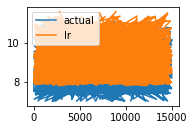

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['lr'],label="lr")
plt.legend()

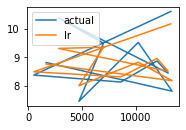

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label="actual")
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()

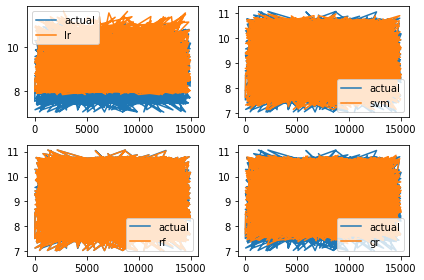

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['lr'],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['svm'],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['rf'],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['gr'],label="gr")

plt.tight_layout()

plt.legend()

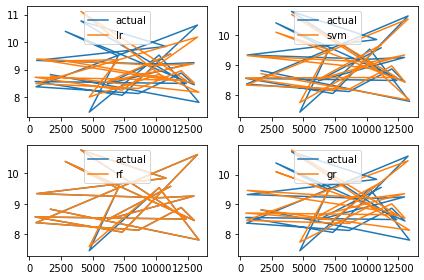

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['lr'].iloc[0:21],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['svm'].iloc[0:21],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['rf'].iloc[0:21],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['gr'].iloc[0:21],label="gr")

plt.tight_layout()

plt.legend()

# Evaluating the algorithm

In [ ]:
from sklearn import metrics
score1= metrics.r2_score(y_test,y_pred1)
score2= metrics.r2_score(y_test,y_pred2)
score3= metrics.r2_score(y_test,y_pred3)
score4= metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.7394504145209879 0.82671578543536 0.9778526221549637 0.8358999683311807


# Mean Square Error

In [ ]:
s1= metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)
print(s1,s2,s3,s4)

0.2913892861035155 0.17875965145955444 0.023827424364983613 0.2131309661270371


#Prediction on train data (for random forest)

In [ ]:
y_p_train=rf.predict(x_train)

In [ ]:
from sklearn import metrics
train_sc1=metrics.r2_score(y_train,y_p_train)
print("R-square value", train_sc1)
train_so1=metrics.mean_absolute_error(y_train,y_p_train)
print("mean_squared_error",train_so1)

R-square value 0.9961935284098007
mean_squared_error 0.01012073126897725


#Hence random forest is giving the best results with 97% accuracy and lowest MSE.

# random forest is giving the best results for our model

# Now training our model on 100% data using random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#model training
model=RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [ ]:
model.predict([[60,24.3,1,0,72,0,0,1,0,0,0,0]])


C:\Users\dibba\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.48140514])

In [ ]:
rf.predict([[60,24.3,1,0,72,0,0,1,0,0,0,0]])


C:\Users\dibba\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.48140514])

In [ ]:
data={'age':46,'bmi':32.3,'no_of_dependents':2,'smoker':0,'bloodpressure':78,'diabetes':1,'regular_ex':1,'sex_male':0,'hereditary_diseases_moderate':0,'hereditary_diseases_severe':0,'job_title_less_stressed':0,'job_title_more_stressed':0}
df3=pd.DataFrame(data,index=[0])
df3

,age,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,sex_male,hereditary_diseases_moderate,hereditary_diseases_severe,job_title_less_stressed,job_title_more_stressed
0,46,32.3,2,0,78,1,1,0,0,0,0,0


In [ ]:
result1 = model.predict(df3)
original_result=np.exp(result1)-1
original_result

array([9343.97909718])